(<matplotlib.collections.PatchCollection at 0x25d9bb49490>,
 <matplotlib.collections.LineCollection at 0x25d9bb4b210>)

C:\Users\Bogdan\anaconda3\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



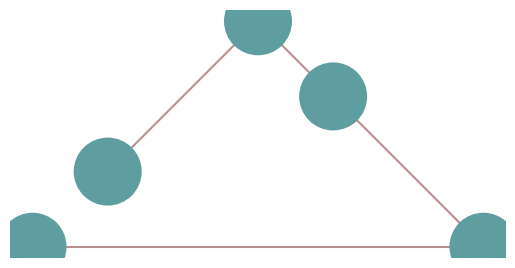

In [11]:
import pypsa
import matplotlib.pyplot as plt

network = pypsa.Network()

nbus=5 #number of buses

for i in range(nbus):
    network.add("Bus", "Bus number {}".format(i), v_nom=132)


for i in range(nbus-1):
    network.add("Line", "Line number {}".format(i), bus0="Bus number {}".format(i), bus1="Bus number {}".format(i+1),
                r=0.02, x=0.3)

network.add("Generator", "Slack Generator", bus="Bus number 0", p_set=0, control="Slack")

network.add("Generator", "Gen number 1", bus="Bus number 3", p_set=60, control="PV")

network.add("Load", "Load number 1", bus="Bus number 4", p_set=91, q_set=41)

network.plot()

In [14]:
network.pf()

network.lines_t.p0 #active power flows on each line

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 2 iterations with error of 0.000000 in 0.015550 seconds


,Line number 0,Line number 1,Line number 2,Line number 3
snapshot,,,,
now,31.01478,31.013671,31.012562,91.011453


In [15]:
network.lines_t.q0 #reactive power flows on each line

,Line number 0,Line number 1,Line number 2,Line number 3
snapshot,,,,
now,-2.04259,-2.059224,-2.075858,41.171801
